In [1]:
import pandas as pd
import numpy as np

In [2]:
# importing the dataset from my drive
data=pd.read_csv('C:/Users/Admin/Desktop/Data Minning/adult_WS#3.csv')

In [3]:
data.shape

(10000, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9939 non-null   object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [5]:
data.isna().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

In [6]:
#replace '?' with NAN and drop rows with NAN values
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

In [7]:
#drop rows with missing values 
data_cleaned = data.dropna()

In [8]:
#drop rows with missing values
data_cleaned.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
#Reindex the DataFrame without null values
data_cleaned.reset_index(drop=True, inplace=True)

In [10]:
#display options to show up to 50 rows and 15 columns, and then displays the first 50 rows of the data DataFrame.
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 15)
data_cleaned.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
3,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
4,37,Private,186808,HS-grad,9,Never-married,Sales,Unmarried,White,Male,0,0,40,United-States,<=50K
5,34,Private,339142,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Female,0,0,40,United-States,<=50K
6,38,Private,101387,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,43,United-States,<=50K
7,62,Private,166691,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
8,50,Local-gov,50178,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,4064,0,55,United-States,<=50K
9,64,Private,188659,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,20,United-States,>50K


In [11]:
# Extracting input features (all columns except 'income')
X = data_cleaned.drop('income', axis=1)

# Extracting output labels (the 'income' column)
y = data_cleaned['income']


In [12]:
y

0        >50K
1       <=50K
2        >50K
3       <=50K
4       <=50K
        ...  
9221    <=50K
9222    <=50K
9223    <=50K
9224     >50K
9225    <=50K
Name: income, Length: 9226, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Apply label encoding to each categorical column
for column in columns_to_encode:
    X[column] = le.fit_transform(X[column])


In [14]:
#normalising the input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [15]:
X

array([[0.16438356, 0.33333333, 0.14645937, ..., 0.        , 0.39175258,
        0.94871795],
       [0.26027397, 0.33333333, 0.19404175, ..., 0.        , 0.44329897,
        0.94871795],
       [0.4109589 , 0.33333333, 0.09386104, ..., 0.        , 0.4742268 ,
        0.94871795],
       ...,
       [0.17808219, 0.33333333, 0.24017637, ..., 0.        , 0.39175258,
        0.94871795],
       [0.32876712, 0.66666667, 0.08575951, ..., 0.        , 0.39175258,
        0.94871795],
       [0.05479452, 0.33333333, 0.17301801, ..., 0.        , 0.39175258,
        0.94871795]])

In [16]:
#encoding the output data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [17]:
y

array([1, 0, 1, ..., 0, 1, 0])

In [18]:
#encoding the output data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [19]:
# splittig the dataset into train and test datasets, with 70% used for training and 30% used for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### CLASSIFICATION 

In [20]:
#defining the classification models 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()

In [21]:
#training the models 
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
#prediction of outcome for four different machine learning
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)

Text(0.5, 1.0, 'DT')

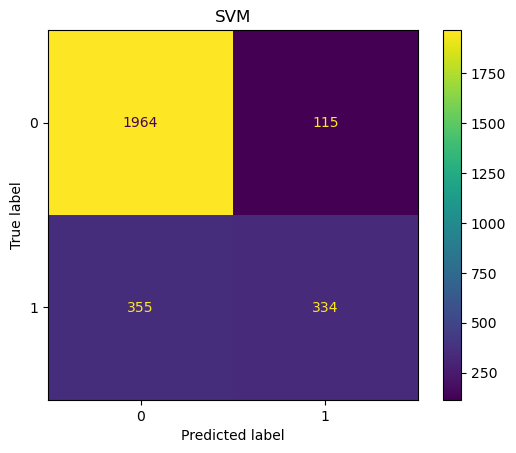

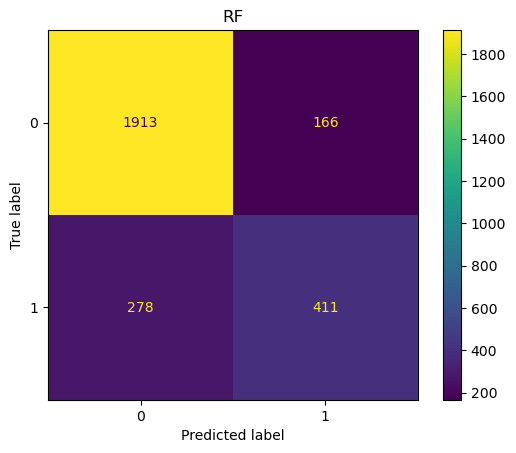

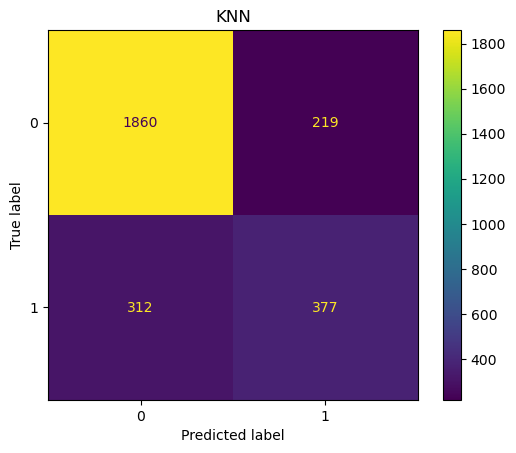

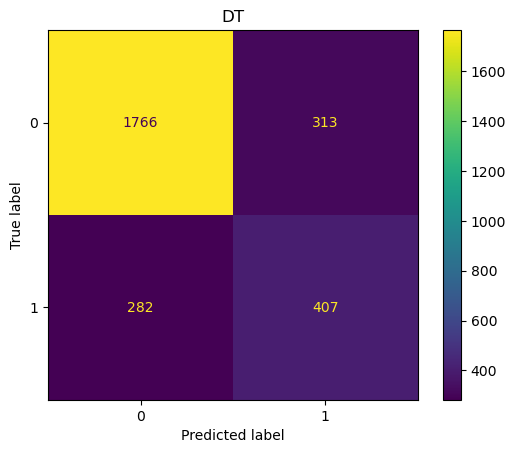

In [23]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("SVM")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("RF")


cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("KNN")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("DT")


In [25]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [26]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')

SVM metrics

True Positives: 334
True Negatives: 1964
False Positives: 115
False Negatives: 355
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.48
Specificity: 0.94
Precision: 0.94
f_1 Score: 0.64



RF metrics

True Positives: 411
True Negatives: 1913
False Positives: 166
False Negatives: 278
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.6
Specificity: 0.92
Precision: 0.92
f_1 Score: 0.72



KNN metrics

True Positives: 377
True Negatives: 1860
False Positives: 219
False Negatives: 312
--------------------------------------------------
Accuracy: 0.81
Mis-Classification: 0.19
Sensitivity: 0.55
Specificity: 0.89
Precision: 0.89
f_1 Score: 0.68



DT metrics

True Positives: 407
True Negatives: 1766
False Positives: 313
False Negatives: 282
--------------------------------------------------
Accuracy: 0.79
Mis-Classification: 0.21
Sensitivity: 0.59
Specificity: 0.85
Precis

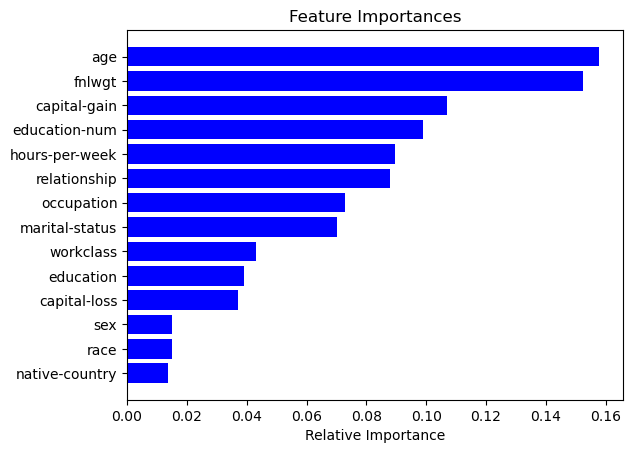

In [27]:
# Getting the most important features
features = data.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [28]:
importances

array([0.15794132, 0.04310748, 0.15251653, 0.0391741 , 0.09897451,
       0.0701489 , 0.07296086, 0.08791687, 0.0149341 , 0.01514841,
       0.10689609, 0.03694777, 0.08970987, 0.0136232 ])

#### IMPROVING MODEL PERFORMANCE USING HYPERPARAMETER TUNNING WITH CROSS-VALIDATION

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Define the models
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()

In [31]:
# Set up hyperparameter grids for each model
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
param_grid_rf = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_dt = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

In [32]:
# Set up GridSearchCV for each model
grid_search_svm = GridSearchCV(SVM, param_grid_svm, cv=5)
grid_search_rf = GridSearchCV(RF, param_grid_rf, cv=5)
grid_search_knn = GridSearchCV(KNN, param_grid_knn, cv=5)
grid_search_dt = GridSearchCV(DT, param_grid_dt, cv=5)

In [33]:
# Fit the models
grid_search_svm.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10]})

In [34]:
# Get the best estimator for each model
best_svm = grid_search_svm.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_dt = grid_search_dt.best_estimator_

In [35]:
# Print the best estimators
print("Best SVM parameters:", best_svm)
print("Best RF parameters:", best_rf)
print("Best KNN parameters:", best_knn)
print("Best DT parameters:", best_dt)

Best SVM parameters: SVC(C=10)
Best RF parameters: RandomForestClassifier(max_depth=10, n_estimators=10)
Best KNN parameters: KNeighborsClassifier(n_neighbors=7)
Best DT parameters: DecisionTreeClassifier(max_depth=10, min_samples_split=10)


In [36]:
import matplotlib.pyplot as plt

def plot_model_params(model, title):
    params = model.get_params()
    # Convert all values to strings for consistent barh plotting
    values = [str(v) for v in params.values()]
    keys = list(params.keys())
    # Determine bar positions
    y_pos = range(len(values))
    # Plot bars
    plt.figure(figsize=(10, 5))
    plt.barh(y_pos, values, align='center')
    plt.yticks(y_pos, keys)
    plt.title(title)
    plt.show()


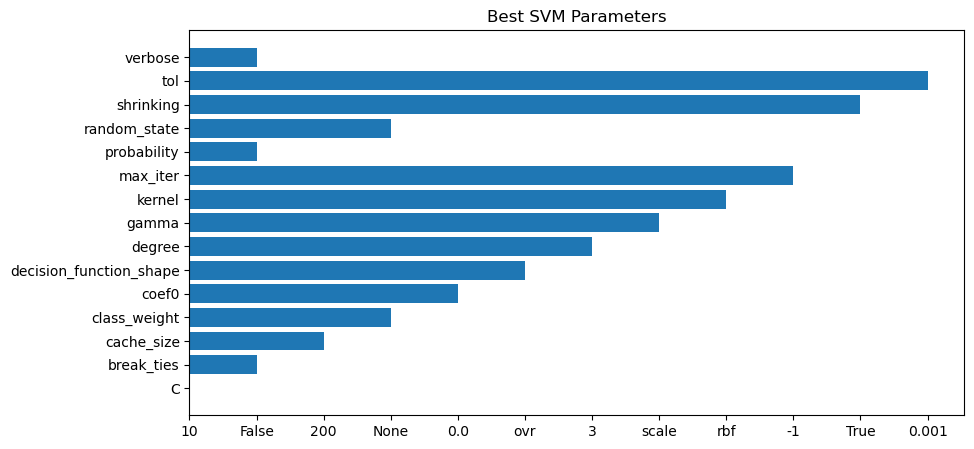

In [37]:
#Plot SVM parameters
plot_model_params(best_svm, 'Best SVM Parameters')


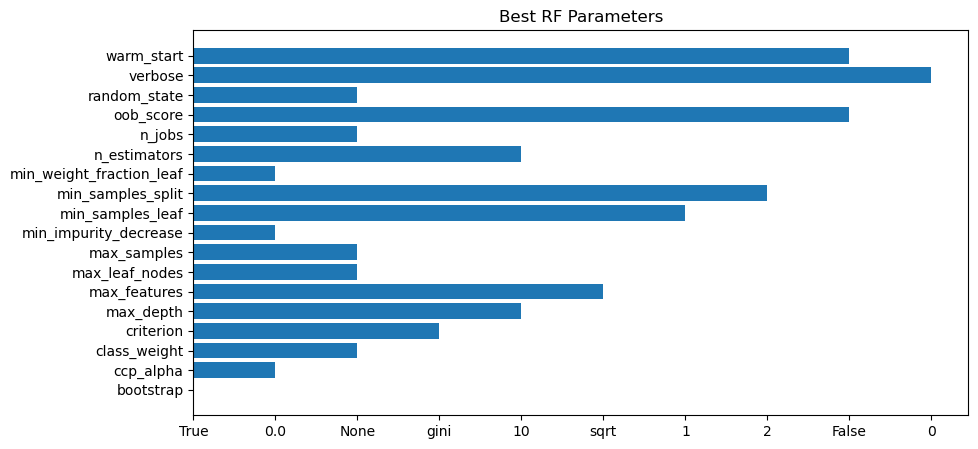

In [38]:
#Plot RF parameters
plot_model_params(best_rf, 'Best RF Parameters')


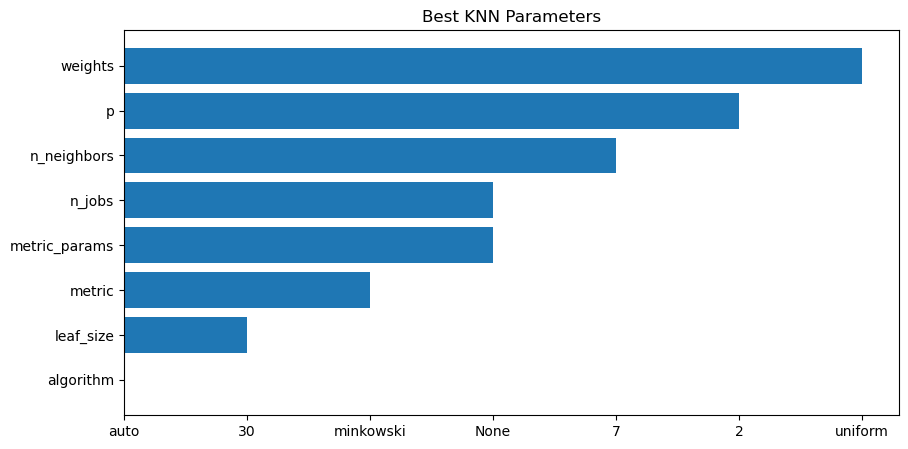

In [39]:
#Plot KNN parameters
plot_model_params(best_knn, 'Best KNN Parameters')

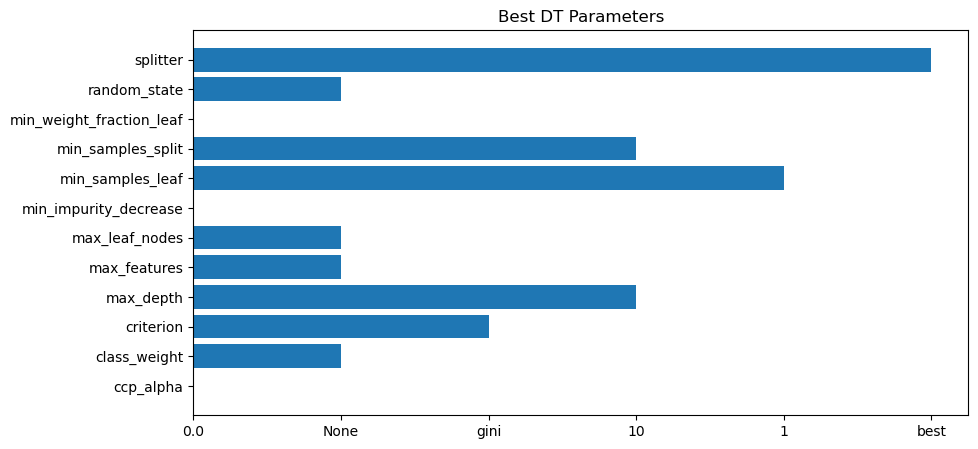

In [40]:
#Plot DT parameters
plot_model_params(best_dt, 'Best DT Parameters')